Оценка для дисперсии:
$$\sigma^2 = \sum\limits_k\frac{X_k^2}{n},$$
Доверительный интервал $(T_1, T_2)$ уровня $\gamma$:
$$P(T_1 \leq \sigma^2 \leq T_2) = \gamma \Rightarrow (T_1, T_2) = \left(\sum_k X_k^2/\lambda_{(1 + \gamma ) / 2}, \sum_k X_k^2/\lambda_{(1 - \gamma) / 2}\right),$$

где $\lambda_p$ -- кванитль порядка $p$ распределения $\xi^2(n)$

In [6]:
from scipy.stats.distributions import chi2, norm
import numpy as np


np.random.seed(0)


def confidence_interval1(gamma, n):
    sample = np.random.normal(size=n)
    lambda_l = chi2.ppf((1 + gamma) / 2, n)
    lambda_r = chi2.ppf((1 - gamma) / 2, n)
    T1 = sum(sample**2 / lambda_l)
    T2 = sum(sample**2 / lambda_r)
    return T1, T2


Проделаем то же самое для оценки дисперсии $$\sigma^2 = \left(\sum_k X_k / n\right)^2$$

Доверительный интервал уровня $\gamma$ такой оценки:

$$(T_1, T_2) = \left(\frac{n\overline{X}^2}{z^2_{(3 + \gamma) / 4}}, \frac{n\overline{X}^2}{z^2_{(3 - \gamma) / 4}}\right)$$

In [27]:
def confidence_interval2(gamma, n):
    sample = np.random.normal(size=n)
    z_l = norm.ppf((3 + gamma) / 4)
    z_r = norm.ppf((3 - gamma) / 4)
    T1 = n * np.mean(sample)**2 / z_l**2
    T2 = n * np.mean(sample)**2 / z_r**2
    return T1, T2

In [28]:
confidence_interval1(0.5, 100)

(0.9176538811125365, 1.1111761428168228)

In [29]:
confidence_interval2(0.5, 100)

(0.9705769681238114, 12.65000374357777)

Исследуем зависимость длины доверительного интервала $T_2 - T_1$ от размера выборки $n$ для уровня $\gamma = 0.9$

---------------gamma=0.9-----------------


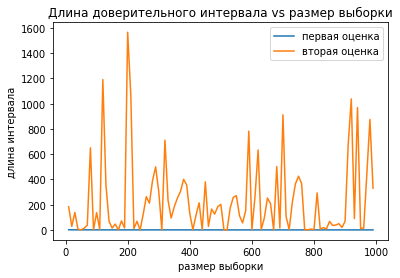

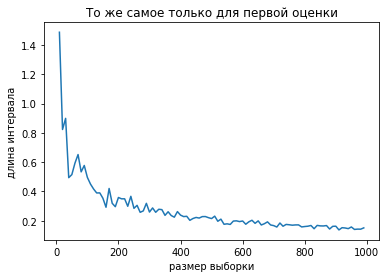

---------------gamma=0.5-----------------


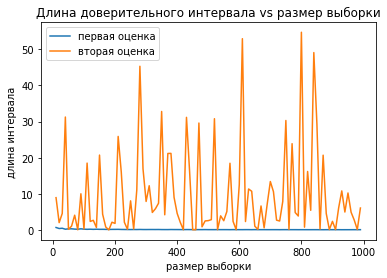

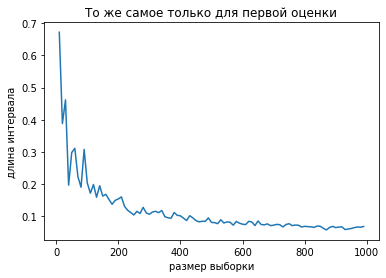

In [36]:
import matplotlib.pyplot as plt

def plotter(gamma):

    length1 = []
    length2 = []
    ns = list(range(10, 1000, 10))
    for n in ns:
        T1, T2 = confidence_interval1(gamma, n)
        length1.append(T2 - T1)
        T1, T2 = confidence_interval2(gamma, n)
        length2.append(T2 - T1)

    plt.plot(ns, length1, label='первая оценка')
    plt.plot(ns, length2, label='вторая оценка')
    plt.xlabel('размер выборки')
    plt.ylabel('длина интервала')
    plt.legend()
    plt.title('Длина доверительного интервала vs размер выборки')

    plt.show()
    
    
    plt.plot(ns, length1)
    
    plt.xlabel('размер выборки')
    plt.ylabel('длина интервала')
    plt.title('То же самое только для первой оценки')
    
    plt.show()

print('---------------gamma=0.9-----------------')    
plotter(0.9)
print('---------------gamma=0.5-----------------')   
plotter(0.5)

Из графиков можно сделать вывод, что первая оценка дисперсии является хорошей, и длина её доверительного интервала фиксированного уровня уменьшается с ростом размера выборки. Вторая оценка же плохая, так как длна её доверительного интервала -- не монотонная функция размера выборки. При этом длина доверительного интервала может быть очень большой.